In [3]:
import sklearn
import sklearn.svm
from sklearn.model_selection import train_test_split
import mne
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy import io

In [4]:
data_path = r'C:\Users\andre\OneDrive\Escritorio\UbuntuShare\Proyecto2\sub-01_eeg'
file_path = os.path.join(data_path, 'sub-01_task-faces_desc-preproc_eeg.set')

In [5]:
beh_fname = os.path.join(data_path, f"sub-01_task-faces_desc-preproc_events.csv")
beh_file = pd.read_csv(beh_fname, sep=",")
beh_file = beh_file[beh_file.bad_trials == 0]

epochs = mne.read_epochs_eeglab(file_path,
                                                events=None,
                                                event_id=None,
                                                eog=(),
                                                verbose=None,
                                                uint16_codec=None)
epochs.events[:, 2] = list(beh_file.COND)
epochs.event_id = {"Scrambled": 0, "Faces": 1}

data_eeg = epochs.get_data()
n_trials, n_electrodes, n_times = data_eeg.shape
y_eeg = epochs.events[:, 2]

C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\mne\externals\pymatreader\utils.py:118: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from C:\Users\andre\OneDrive\Escritorio\UbuntuShare\Proyecto2\sub-01_eeg\sub-01_task-faces_desc-preproc_eeg.set...


<ipython-input-5-62321b867827>:5: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(file_path,
<ipython-input-5-62321b867827>:5: RuntimeWarning: Data file name in EEG.data (01_DNP_FACES_250HZ_dtle_icap_iav_z.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-01_task-faces_desc-preproc_eeg.fdt).
  epochs = mne.read_epochs_eeglab(file_path,


Not setting metadata
Not setting metadata
588 matching events found
No baseline correction applied
0 projection items activated
Ready.


In [6]:
roi = io.loadmat(r'C:\Users\andre\OneDrive\Escritorio\UbuntuShare\Proyecto2\sub-01_pseudotrials_ESI')
data_roi = roi['X']
y_roi = roi['y']

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\andre\\OneDrive\\Escritorio\\UbuntuShare\\Proyecto2\\sub-01_pseudotrials_ESI.mat'

In [27]:
accuracies = np.zeros(n_times)

In [30]:
for t in range(n_times):
    X = data_eeg[:,:,t]
    clf = sklearn.svm.SVC()
    clf.fit(X, y_eeg)
    y_pred = clf.predict(X)
    
    accuracies[t] = np.mean(y_eeg == y_pred) * 100

(0.0, 0.5)

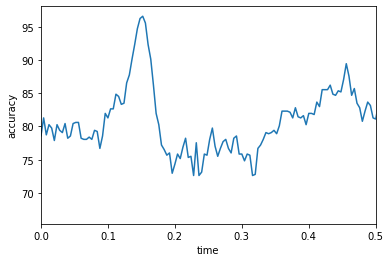

In [34]:
time = epochs.times
plt.plot(time, accuracies)
plt.xlabel('time')
plt.ylabel('accuracy')
plt.xlim(0, 0.5)

In [39]:
for t in range(n_times):
    X_train, X_test, y_train, y_test = train_test_split(data[:,:,t], y, test_size=0.4, random_state=0)
    clf = sklearn.svm.SVC()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracies[t] = np.mean(y_test == y_pred) * 100

(0.0, 0.5)

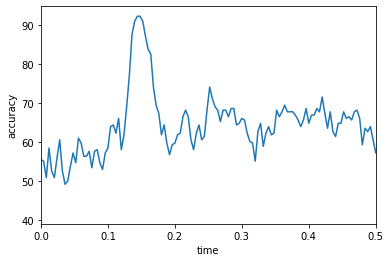

In [40]:
time = epochs.times
plt.plot(time, accuracies)
plt.xlabel('time')
plt.ylabel('accuracy')
plt.xlim(0, 0.5)

In [ ]:
n_trials_roi, n_electrodes_roi, n_times_roi = data_roi.shape
accuracies_roi = np.zeros(n_times_roi)

In [ ]:
n_times_roi

In [18]:
for t in range(n_times_roi):
    X_train_roi, X_test_roi, y_train_roi, y_test_roi = train_test_split(data_roi[:,:,t], y_roi, test_size=0.4, random_state=0)
    clf = sklearn.svm.SVC()
    clf.fit(X_train_roi, y_train_roi)
    y_pred = clf.predict(X_test_roi)
    accuracies_roi[t] = np.mean(y_test_roi == y_pred) * 100

ValueError: Input contains NaN, infinity or a value too large for dtype('<f8').

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [51]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

h = .02
n_clf = len(classifiers)
accuracies = np.zeros([n_times, n_clf])

figure = plt.figure(figsize=(27, 9))

for t in range(n_times):
    i = 0
    X = data_eeg[:,:,t]
    y = y_eeg
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4)
    
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracies[t][i] = np.mean(y_test == y_pred) * 100
        i += 1

C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variab

C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variab

C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variab

C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variab

C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variab

C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variab

C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variab

C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variab

C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variab

C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variab

C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variab

C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variab

C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\andre\anaconda3\envs\EEG\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variab

<Figure size 1944x648 with 0 Axes>

Text(0, 0.5, 'accuracy')

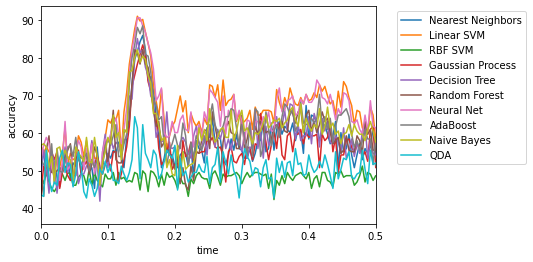

In [54]:
for i, name in enumerate(names):
    time = epochs.times
    plt.plot(time, accuracies[:,i], label=name)

plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.xlim(0, 0.5)    
plt.xlabel('time')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

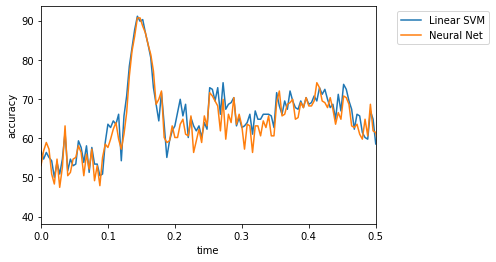

In [62]:
plt.plot(time, accuracies[:,1], label=names[1])
plt.plot(time, accuracies[:,6], label=names[6])
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.xlim(0, 0.5)    
plt.xlabel('time')
plt.ylabel('accuracy')

In [69]:
for it, name in enumerate(names):
    print(name,':', accuracies[:,it].sum())

Nearest Neighbors : 32287.288135593222
Linear SVM : 33608.898305084746
RBF SVM : 30003.813559322032
Gaussian Process : 32295.76271186441
Decision Tree : 32548.30508474576
Random Forest : 32504.661016949154
Neural Net : 33225.847457627126
AdaBoost : 32887.28813559322
Naive Bayes : 33159.32203389831
QDA : 30746.610169491527
